# Libraries

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Data Collection

In [44]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data (pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


# Data Exploration

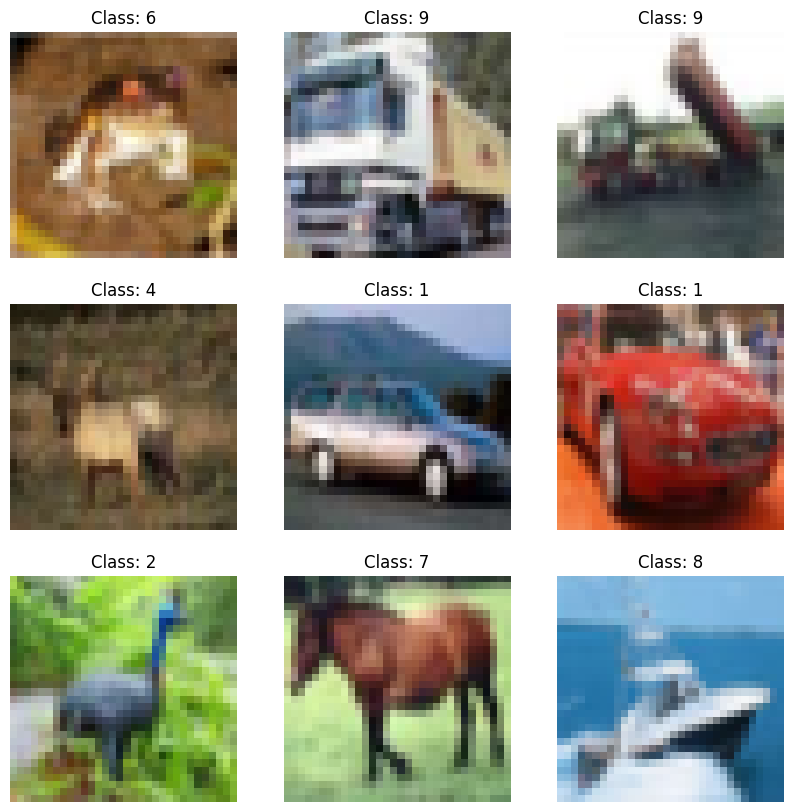

In [45]:

#Show sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis("off")
plt.show()

# Model Design

##### Convolution: A mathematical operation that combines two functions (or signals) to produce a third function

 **`Conv2D(32, (3, 3))`**: 
  - Adds a 2D convolutional layer with **32 filters** (also known as kernels), each of size **3x3**. 
- **`activation='relu'`**: 
  - Uses the ReLU (Rectified Linear Unit) activation function, which helps introduce non-linearity. 
- **`input_shape=(32, 32, 3)`**: 
  - Specifies the input shape of the images (**32 pixels high**, **32 pixels wide**, and **3 color channels** for RGB).


In [46]:

# Build the CNN model
model = models.Sequential()

#Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for CIFAR-10

#Summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

# Compile the Model

loss='sparse_categorical_crossentropy'

This function calculates the difference between the predicted class probabilities and the true class labels.

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

Each epoch consists of one full cycle through the training data.

In [48]:
 #20% of the data for validation
history = model.fit(x_train, y_train, epochs=15, 
                    batch_size=64, 
                    validation_split=0.2) 


Epoch 1/15
625/625 [==============================] - 17s 26ms/step - loss: 1.6813 - accuracy: 0.3815 - val_loss: 1.4768 - val_accuracy: 0.4612
Epoch 2/15
625/625 [==============================] - 15s 24ms/step - loss: 1.3174 - accuracy: 0.5267 - val_loss: 1.2599 - val_accuracy: 0.5448
Epoch 3/15
625/625 [==============================] - 15s 25ms/step - loss: 1.1705 - accuracy: 0.5848 - val_loss: 1.1642 - val_accuracy: 0.5847
Epoch 4/15
625/625 [==============================] - 15s 25ms/step - loss: 1.0767 - accuracy: 0.6227 - val_loss: 1.0537 - val_accuracy: 0.6344
Epoch 5/15
625/625 [==============================] - 15s 24ms/step - loss: 1.0094 - accuracy: 0.6457 - val_loss: 1.0293 - val_accuracy: 0.6427
Epoch 6/15
625/625 [==============================] - 15s 25ms/step - loss: 0.9477 - accuracy: 0.6682 - val_loss: 0.9708 - val_accuracy: 0.6637
Epoch 7/15
625/625 [==============================] - 15s 25ms/step - loss: 0.9037 - accuracy: 0.6845 - val_loss: 0.9432 - val_accuracy:

# Model Evaluation

In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.8898 - accuracy: 0.7007
Test accuracy: 0.7006999850273132


The current accuracy is 0.7088, solid startpoint

# Visualize Training Results

Comparing T Accuracy and Validation Throughout the Epoch Runs

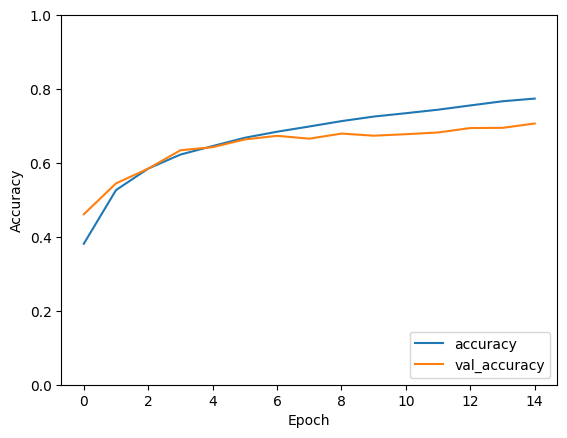

In [50]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Predicting

313/313 [==============================] - 1s 4ms/step


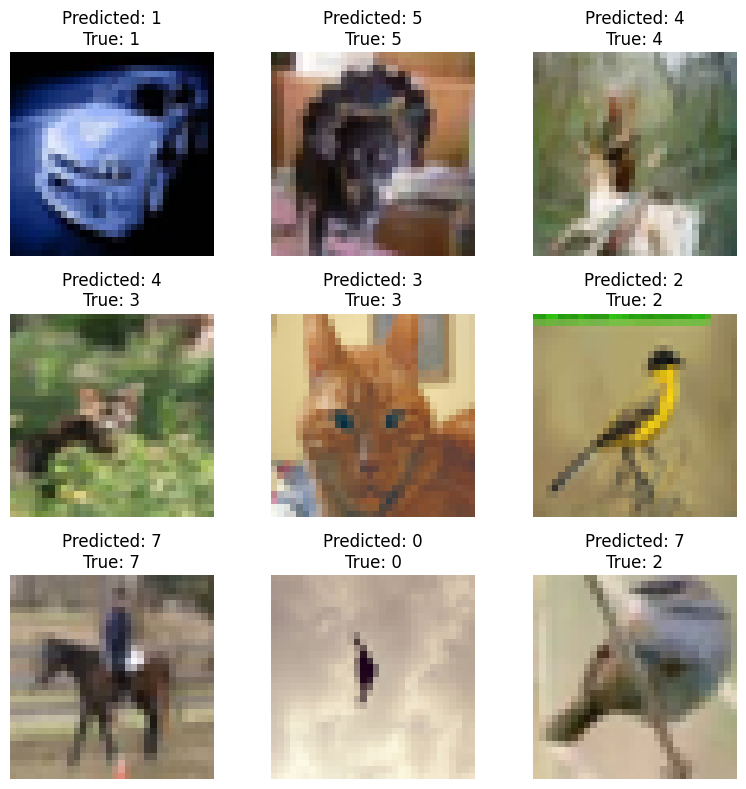

In [51]:

predictions = model.predict(x_test)

#Display 9 images
num_images = 9 
# Randomly select indices
indices = np.random.choice(len(x_test), num_images, replace=False)  

plt.figure(figsize=(8, 8))

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {predictions[idx].argmax()}\nTrue: {y_test[idx][0]}")
    plt.axis('off')  #Hide axes

plt.tight_layout()
plt.show()



# Predicting from External Source

Testing the model with a new picture outside of the dataset

In [52]:
uploaded_image_path = r'C:\Users\ivanm\Downloads\old-car.jpg'

1/1 [==============================] - 0s 24ms/step


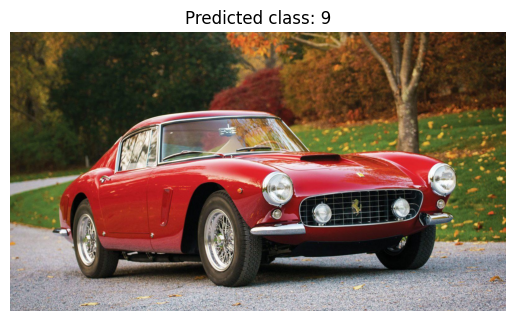

In [53]:
def load_and_preprocess_image(img_path):
    # Load Image
    img = image.load_img(img_path, target_size=(32, 32))
    # Convert to array
    img_array = image.img_to_array(img)
    #Normalize the Image
    img_array = img_array / 255.0
    #dd a batch Dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

#Path to the uploaded image
uploaded_image_path = r'C:\Users\ivanm\Downloads\old-car.jpg'

#Preprocess the image
preprocessed_image = load_and_preprocess_image(uploaded_image_path)

#Make a prediction
predictions = model.predict(preprocessed_image)
predicted_class = predictions.argmax()

#Display the image and prediction
plt.imshow(image.load_img(uploaded_image_path))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

Correct Prediction, Class 1